# Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets (also called supercenters), discount department stores, and grocery stores in the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in nearby Rogers, Arkansas in 1962 and incorporated under Delaware General Corporation Law on October 31, 1969. It also owns and operates Sam's Club retail warehouses. In India, Walmart operates under the name of Flipkart Wholesale.

# As of July 31, 2022, Walmart has 10,585 stores and clubs in 24 countries, operating under 46 different names. Out of which we have chosen 45 stores for basic analysis.

In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Arbaj\Downloads\archive\Walmart.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [2]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

<Figure size 576x720 with 0 Axes>

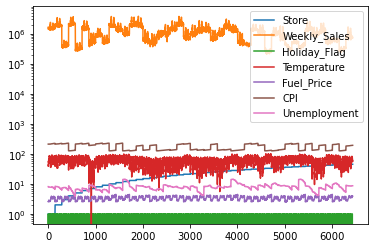

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,10))
df.plot()
plt.yscale('log')
plt.show()

In [6]:
df.corr(method='spearman')

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000,-0.309227,0.000000,-0.026392,0.064878,-0.238852,0.304139
Weekly_Sales,-0.309227,1.000000,0.027774,-0.070962,0.025471,-0.055040,-0.062354
Holiday_Flag,0.000000,0.027774,1.000000,-0.143588,-0.080111,-0.004752,0.011177
Temperature,-0.026392,-0.070962,-0.143588,1.000000,0.128624,0.165957,0.038833
Fuel_Price,0.064878,0.025471,-0.080111,0.128624,1.000000,-0.045867,-0.064725
CPI,-0.238852,-0.055040,-0.004752,0.165957,-0.045867,1.000000,-0.388563
Unemployment,0.304139,-0.062354,0.011177,0.038833,-0.064725,-0.388563,1.000000


Weekly_Sales    1.000000
Holiday_Flag    0.036891
Fuel_Price      0.009464
Temperature    -0.063810
CPI            -0.072634
Unemployment   -0.106176
Store          -0.335332
Name: Weekly_Sales, dtype: float64


<AxesSubplot:>

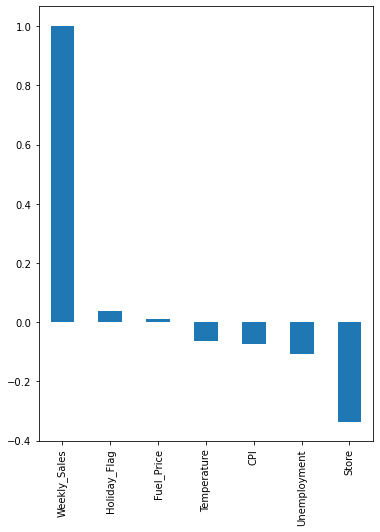

In [7]:
plt.figure(figsize=(6,8))
print(df.corr(method='pearson').Weekly_Sales.sort_values(ascending=False))
df.corr(method='pearson').Weekly_Sales.sort_values(ascending=False).plot(kind='bar',lw=5)

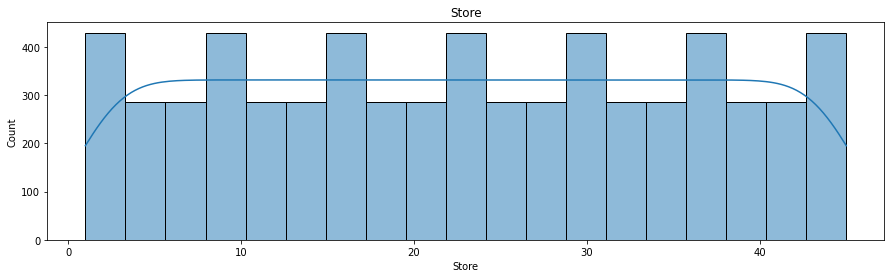

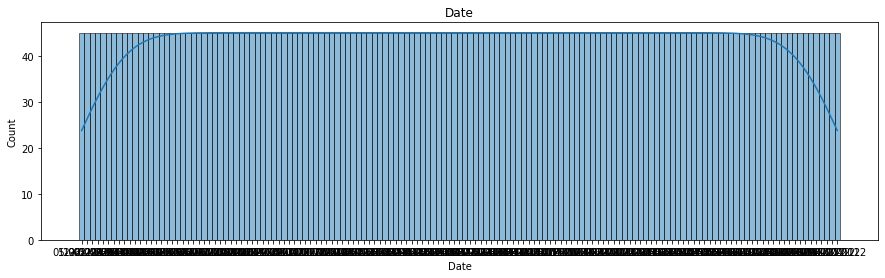

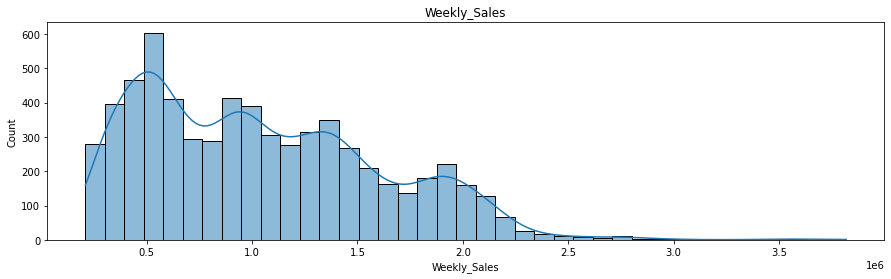

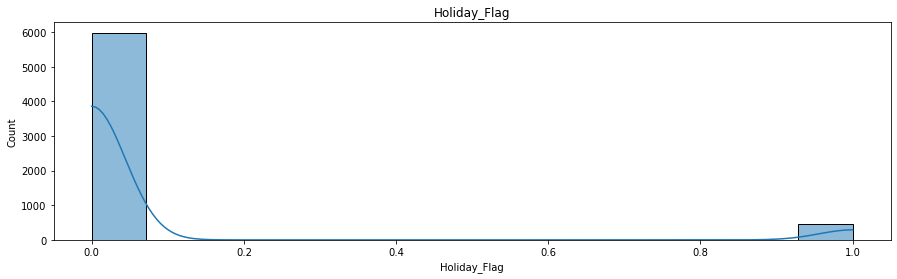

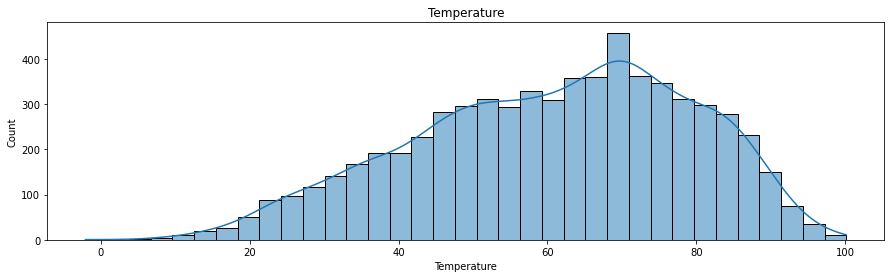

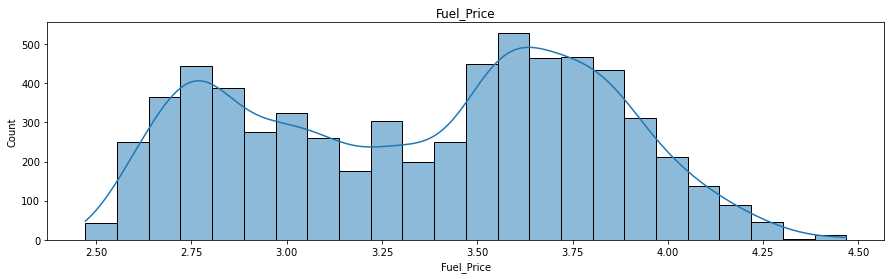

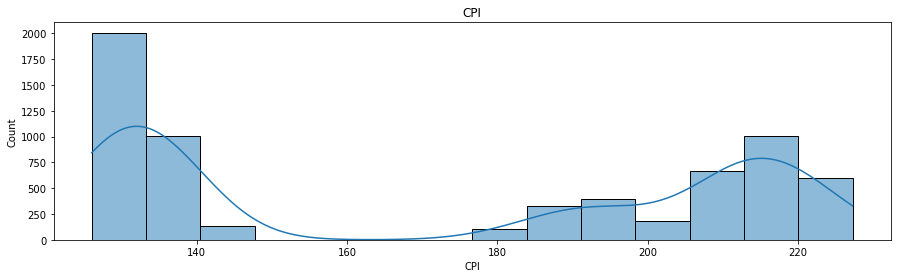

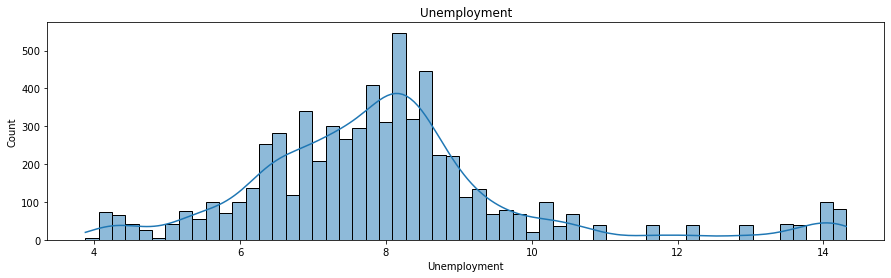

In [8]:
import seaborn as sns
for i in df.columns:
    plt.figure(figsize=(15,4))
    sns.histplot(df[i],kde=True)
    plt.title('%s'%(i))
    plt.show()

In [9]:
import warnings
warnings.simplefilter('ignore')
df1=df.drop('Date',axis=1)
data=pd.DataFrame(index=['stat','p','distribution'])
from scipy.stats import shapiro
for i in df1.columns:
    stat,p = shapiro(df[i])
    
    if p>0.05:
        x=['normal']
    else:
        x=['not normal']
    data['%s'%i]=[stat,'%.10f'%p,x]

In [10]:
data

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
stat,0.953694,0.947068,0.276722,0.980374,0.953233,0.789118,0.902835
p,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
distribution,[not normal],[not normal],[not normal],[not normal],[not normal],[not normal],[not normal]


In [11]:
df1=df.drop('Date',axis=1)
df1.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106


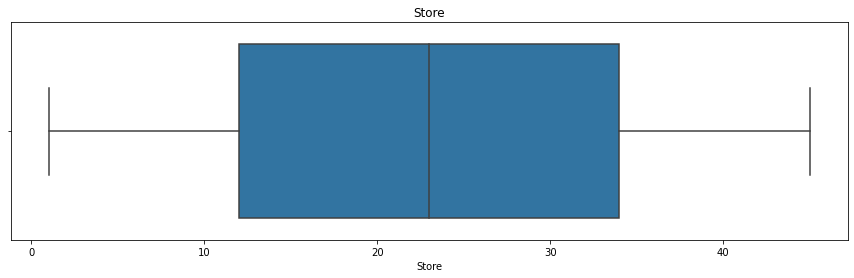

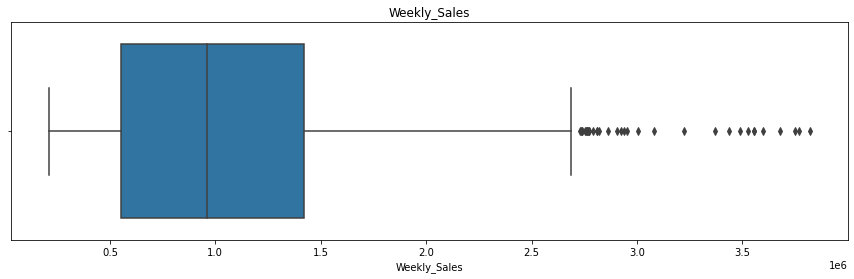

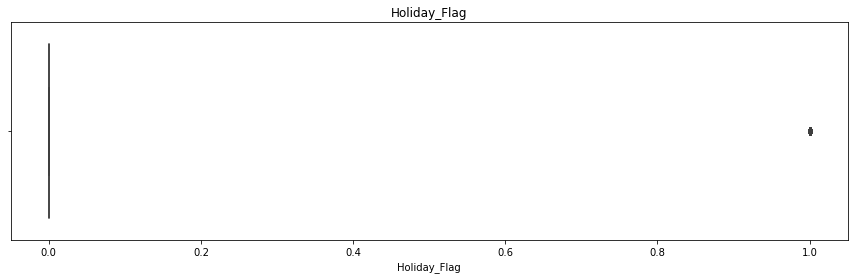

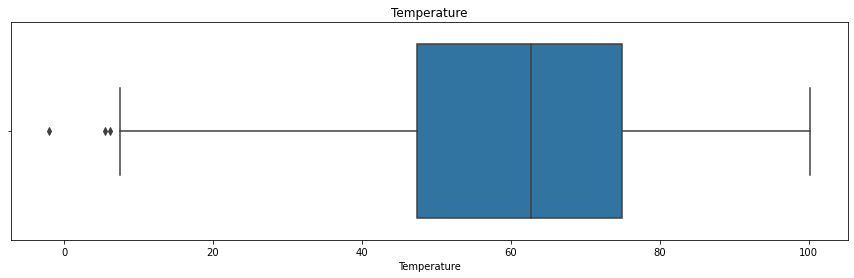

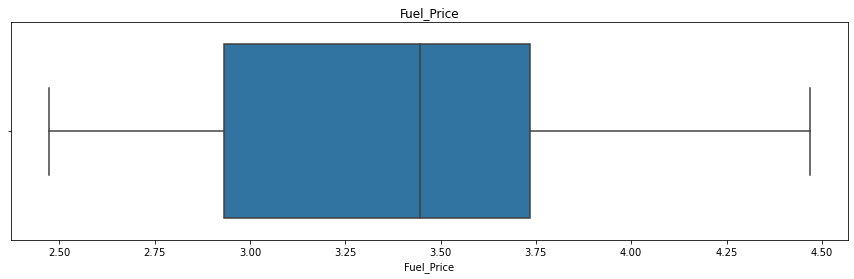

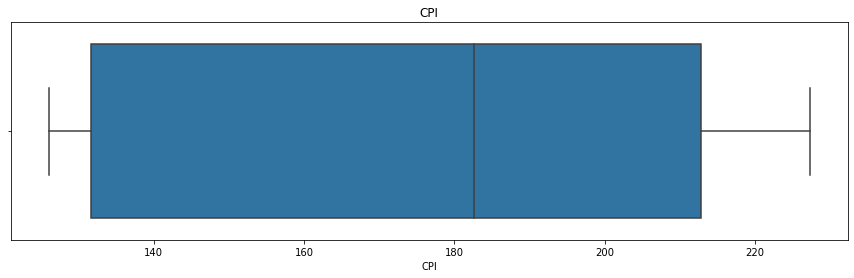

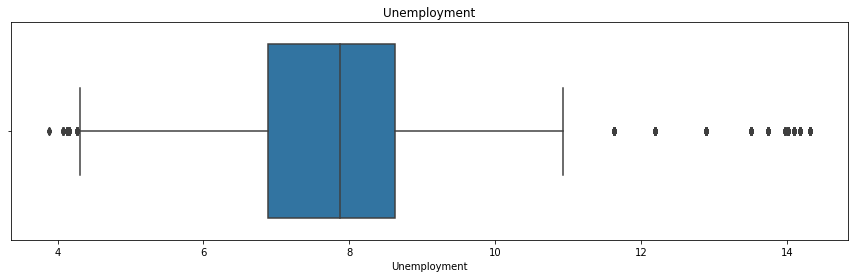

In [12]:
for i in df1.columns:
    plt.figure(figsize=(15,4))
    sns.boxplot(df1[i])
    plt.title('%s'%i)
    plt.show()

In [13]:
df['Date']=pd.to_datetime(df['Date'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [15]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [16]:
df['year']=pd.DatetimeIndex(df['Date']).year
df['month']=pd.DatetimeIndex(df['Date']).month
df['week']=pd.DatetimeIndex(df['Date']).week

In [17]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,18


In [18]:
import numpy as np
np.percentile(df.Unemployment,75)+1.5*(np.percentile(df.Unemployment,75)-np.percentile(df.Unemployment,25))

11.218499999999999

In [19]:
maxi=[]
names=[]
mini=[]
for i in df1.columns:
    print('%s'%i,'max=%i'%(np.percentile(df[i],75)+1.5*(np.percentile(df[i],75)-np.percentile(df[i],25))),'min=%i'%(np.percentile(df[i],25)-1.5*(np.percentile(df[i],75)-np.percentile(df[i],25))))
    data=pd.DataFrame()
    maxi.append(int(np.percentile(df[i],75)+1.5*(np.percentile(df[i],75)-np.percentile(df[i],25))))
    mini.append(int(np.percentile(df[i],25)-1.5*(np.percentile(df[i],75)-np.percentile(df[i],25))))
    names.append(str(i))
    data['names']=names
    data['maxi']=maxi
    data['mini']=mini
    

Store max=67 min=-21
Weekly_Sales max=2720371 min=-746862
Holiday_Flag max=0 min=0
Temperature max=116 min=6
Fuel_Price max=4 min=1
CPI max=334 min=10
Unemployment max=11 min=4


In [20]:
data

,names,maxi,mini
0,Store,67,-21
1,Weekly_Sales,2720371,-746862
2,Holiday_Flag,0,0
3,Temperature,116,6
4,Fuel_Price,4,1
5,CPI,334,10
6,Unemployment,11,4


In [21]:
df=df[(df.Weekly_Sales<2720371) & (df.Weekly_Sales>-746862)]
df=df[(df.Store<67) & (df.Store>-21)]

df=df[(df.Temperature<116) & (df.Temperature>6)]
df=df[(df.Fuel_Price<4) & (df.Fuel_Price>1)]
df=df[(df.CPI<334) & (df.CPI>10)]
df=df[(df.Unemployment<10.5) & (df.Unemployment>4.5)]


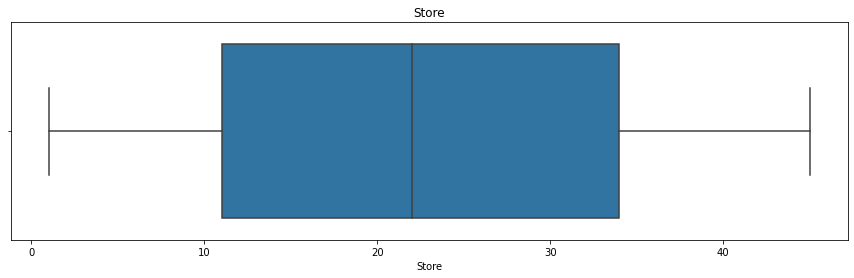

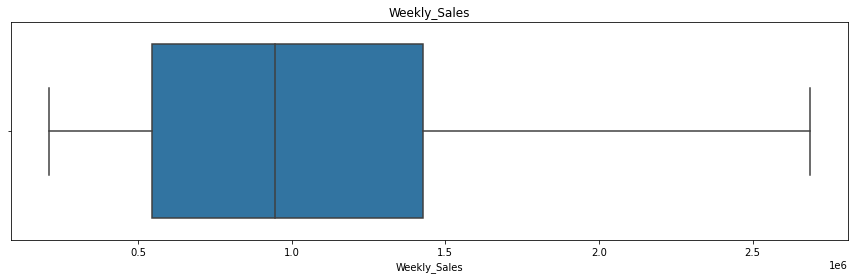

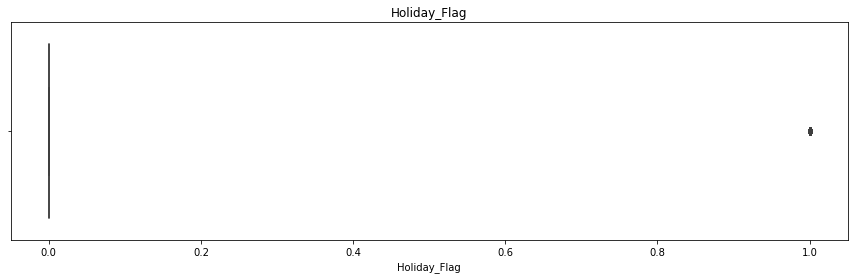

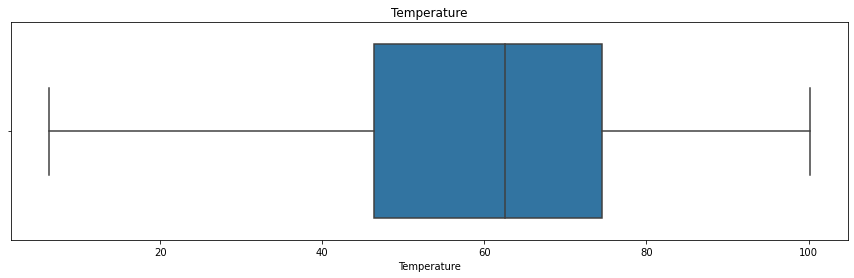

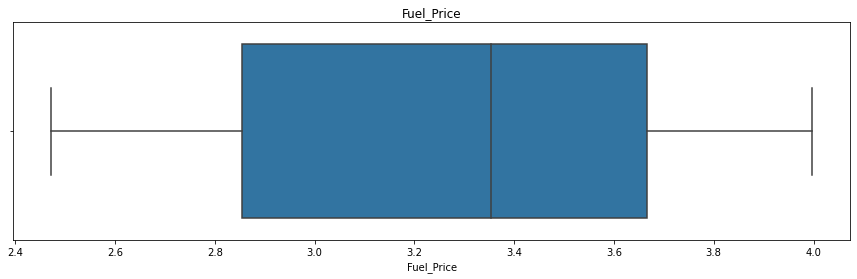

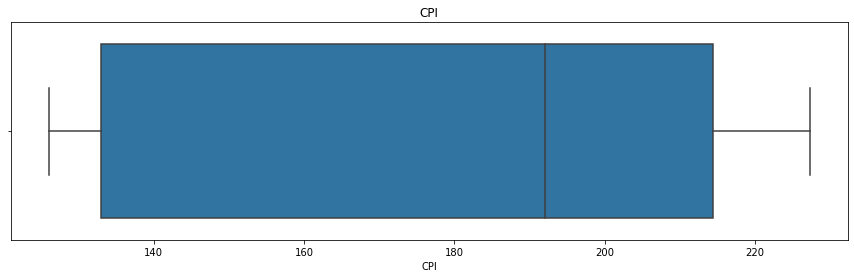

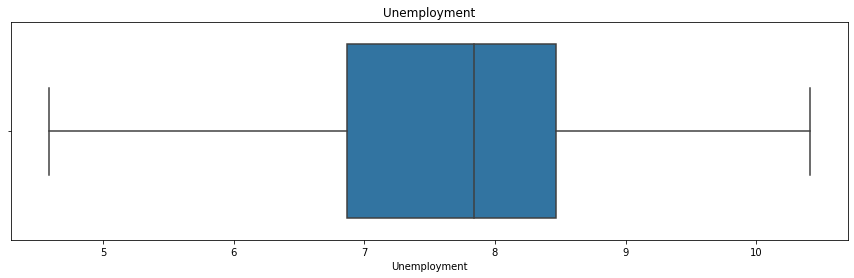

In [22]:
for i in df1.columns:
    plt.figure(figsize=(15,4))
    sns.boxplot(df[i])
    plt.title('%s'%i)
    plt.show()

In [23]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,18
...,...,...,...,...,...,...,...,...,...,...,...
6428,45,2012-09-14,702238.27,0,67.87,3.948,191.699850,8.684,2012,9,37
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,39
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,19
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,42


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5466 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         5466 non-null   int64         
 1   Date          5466 non-null   datetime64[ns]
 2   Weekly_Sales  5466 non-null   float64       
 3   Holiday_Flag  5466 non-null   int64         
 4   Temperature   5466 non-null   float64       
 5   Fuel_Price    5466 non-null   float64       
 6   CPI           5466 non-null   float64       
 7   Unemployment  5466 non-null   float64       
 8   year          5466 non-null   int64         
 9   month         5466 non-null   int64         
 10  week          5466 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 512.4 KB


In [25]:
l=[]
for i in df.Store.value_counts().index:
    l.append(df[df.Store==i]['Weekly_Sales'].sum())

(0.0, 46.0)

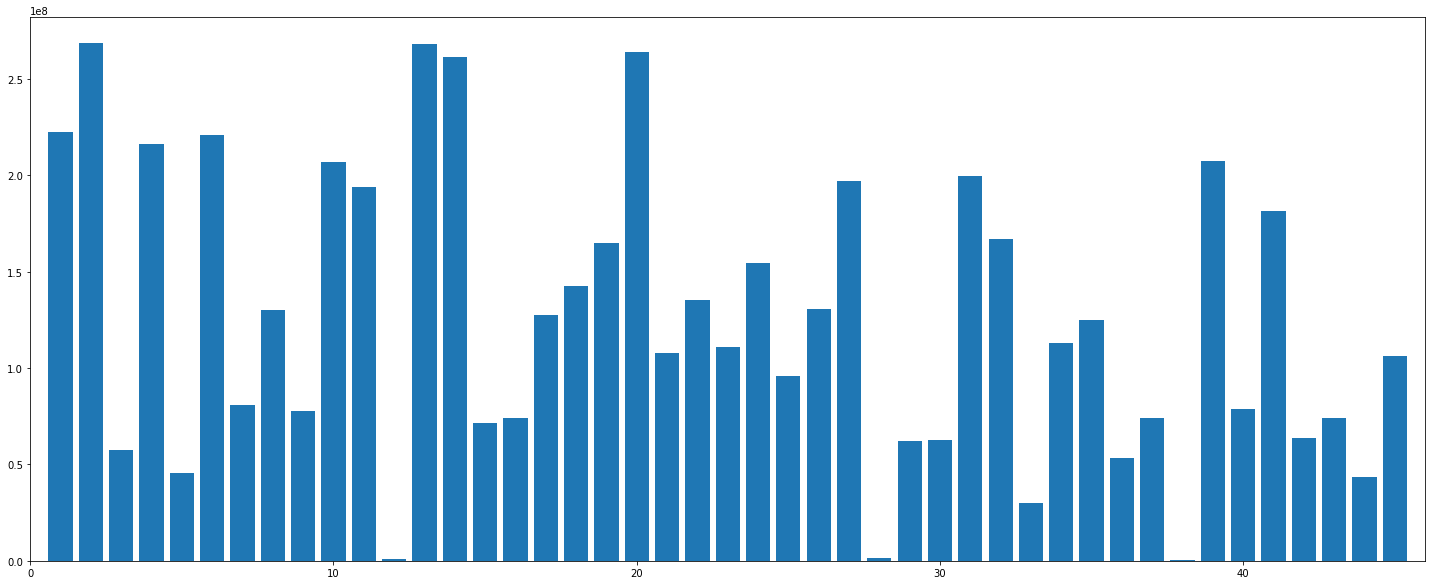

In [26]:
plt.figure(figsize=(25,10))
plt.bar(df.Store.value_counts().index,l)
plt.xlim(0,46)

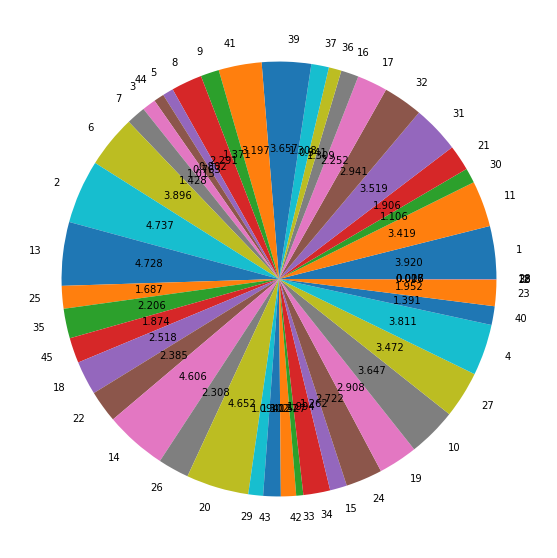

In [27]:
plt.figure(figsize=(10,10))
plt.pie(l,labels=df.Store.value_counts().index,autopct="%.3f")
plt.show()

In [28]:
Y=[]
for i in df.year.value_counts().index:
    Y.append(df[df.year==i]['Weekly_Sales'].sum())
Y

[2079959638.94, 2088976503.83, 1504195433.6999998]

([<matplotlib.patches.Wedge at 0x28a264c09d0>,
 [Text(0.447515185221206, 1.004853302226962, '2011'),
  Text(-1.0445598623705359, -0.3448110988997417, '2010'),
  Text(0.7399464140757454, -0.8139283164360641, '2012')],
 [Text(0.2440991919388396, 0.5481018012147064, '36.7%'),
  Text(-0.5697599249293831, -0.18807878121804092, '36.8%'),
  Text(0.4036071349504065, -0.4439608998742167, '26.5%')])

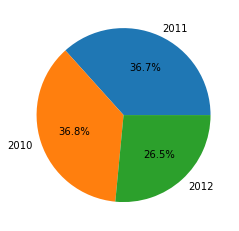

In [29]:
plt.pie(Y,labels=df.year.value_counts().index,autopct='%1.1f%%')

In [30]:
M=[]
for i in df.year.value_counts().index:
    
    for j in df.month.value_counts().index:
    
        M.append('year=%i,month=%i,sales=%i'%(i,j,df[(df.year==i)&(df.month==j)]['Weekly_Sales'].sum()))
M

['year=2011,month=7,sales=199591516',
 'year=2011,month=10,sales=159479327',
 'year=2011,month=4,sales=238636626',
 'year=2011,month=9,sales=209081736',
 'year=2011,month=8,sales=171133145',
 'year=2011,month=3,sales=121258012',
 'year=2011,month=5,sales=113347157',
 'year=2011,month=2,sales=171967164',
 'year=2011,month=6,sales=106870212',
 'year=2011,month=12,sales=173988347',
 'year=2011,month=1,sales=195913869',
 'year=2011,month=11,sales=218692521',
 'year=2010,month=7,sales=173979790',
 'year=2010,month=10,sales=213505447',
 'year=2010,month=4,sales=173226304',
 'year=2010,month=9,sales=169667912',
 'year=2010,month=8,sales=173923039',
 'year=2010,month=3,sales=174590226',
 'year=2010,month=5,sales=263556635',
 'year=2010,month=2,sales=180212497',
 'year=2010,month=6,sales=134496227',
 'year=2010,month=12,sales=258448523',
 'year=2010,month=1,sales=39350904',
 'year=2010,month=11,sales=134018995',
 'year=2012,month=7,sales=148151831',
 'year=2012,month=10,sales=143008682',
 'year

In [31]:
monthly_sales=[]
for j in df.month.value_counts().index:
    
        monthly_sales.append(df[(df.month==j)]['Weekly_Sales'].sum())
monthly_sales

[521723139.48,
 515993457.83,
 508353459.5,
 498948562.37,
 493438688.34000003,
 476921551.78,
 478506970.8399999,
 479152884.71000004,
 476550661.99,
 454115636.47,
 384726859.34000003,
 384699703.82]

In [32]:
df.month.value_counts().index

Int64Index([7, 10, 4, 9, 8, 3, 5, 2, 6, 12, 1, 11], dtype='int64')

In [33]:
df[(df.year==2010)&(df.month==2)]['Weekly_Sales'].sum()

180212497.26

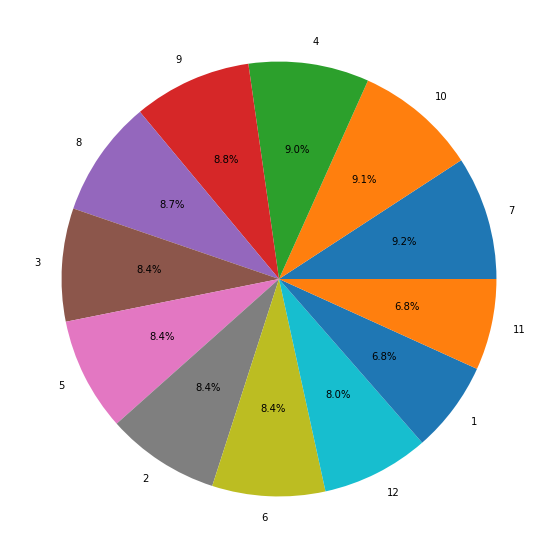

In [34]:
plt.figure(figsize=(10,10))
plt.pie(monthly_sales,labels=df.month.value_counts().index,autopct='%1.1f%%')
plt.show()

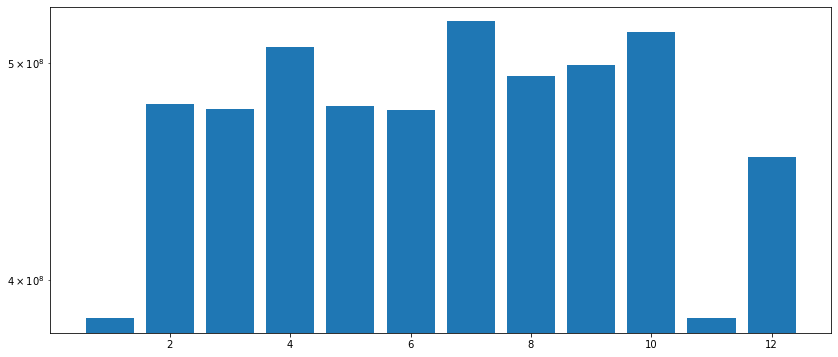

In [35]:
plt.figure(figsize=(14,6))
plt.bar(df.month.value_counts().index,monthly_sales)
plt.yscale('log')
plt.show()

In [36]:
I=pd.DataFrame(index=df.month.value_counts().index)
I['sales']=monthly_sales
I.sort_values(by='sales',ascending=False)

,sales
7,5.217231e+08
10,5.159935e+08
4,5.083535e+08
9,4.989486e+08
8,4.934387e+08
2,4.791529e+08
5,4.785070e+08
3,4.769216e+08
6,4.765507e+08
12,4.541156e+08


In [37]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,18
...,...,...,...,...,...,...,...,...,...,...,...
6428,45,2012-09-14,702238.27,0,67.87,3.948,191.699850,8.684,2012,9,37
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,39
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,19
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,42


In [38]:
features=df.drop(['Date','Weekly_Sales'],axis=1)
target=df.Weekly_Sales

In [39]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()

In [40]:
RF.fit(features,target)

RandomForestRegressor()

In [41]:
RF.feature_importances_

array([7.31713382e-01, 2.23742502e-03, 1.19668667e-02, 8.80500779e-03,
       1.72108205e-01, 4.67108489e-02, 6.18526838e-04, 2.68579149e-03,
       2.31539457e-02])

<BarContainer object of 9 artists>

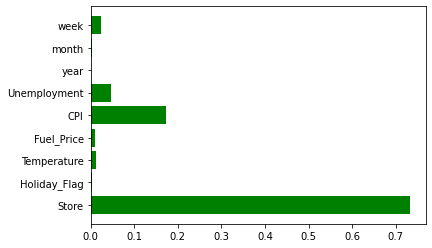

In [42]:
plt.barh(features.columns,RF.feature_importances_,color='g')

In [43]:
features=features.drop(['month','year','Holiday_Flag'],axis=1)

In [44]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
features=m.fit_transform(features)

In [45]:
from sklearn.decomposition import PCA
P=PCA(n_components=2)
new_features=P.fit(features,target).transform(features)


In [46]:
RF.feature_importances_

array([7.31713382e-01, 2.23742502e-03, 1.19668667e-02, 8.80500779e-03,
       1.72108205e-01, 4.67108489e-02, 6.18526838e-04, 2.68579149e-03,
       2.31539457e-02])

([<matplotlib.patches.Wedge at 0x28a2c0ec2e0>,
 [Text(-0.3634413371141963, 1.0382246358455598, 'PCA1'),
  Text(0.3634413371141964, -1.0382246358455598, 'PCA2')],
 [Text(-0.19824072933501613, 0.5663043468248508, '60.7%'),
  Text(0.19824072933501619, -0.5663043468248508, '39.3%')])

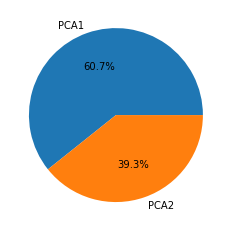

In [47]:
RF.fit(new_features,target)
plt.pie(RF.feature_importances_,labels=['PCA1','PCA2'],autopct='%1.1f%%')

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(new_features,target,test_size=.20)

In [50]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)
pred=model.predict(X_test)

In [52]:
from sklearn.metrics import mean_squared_error,r2_score
model.score(X_train,y_train)

0.04353955422791678

In [53]:
features1=df.drop(['Date','Weekly_Sales'],axis=1)
target1=df.Weekly_Sales

In [54]:
features1=features1.drop(['month','year','Holiday_Flag'],axis=1)

In [55]:
X_train,X_test,y_train,y_test=train_test_split(features1,target,test_size=.20)


model1=LinearRegression(fit_intercept=True)
model1.fit(X_train,y_train)
pred1=model1.predict(X_test)

In [57]:
model1.score(X_test,y_test)

0.11160904609963784